In [ ]:


# Load and preprocess the credit card dataset (replace this with your actual preprocessing steps)
# Example of loading a sample dataset (you need to replace this with your dataset)
data = pd.read_csv('your_credit_card_dataset.csv')

# Example preprocessing steps (replace this with your actual preprocessing steps)
data.fillna(data.mean(), inplace=True)
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert rows of the credit card data to images
def row_to_image(row, idx, subset):
    img = Image.new('RGB', (200, 100), color=(255, 255, 255))
    d = ImageDraw.Draw(img)

    # Modify text representation as needed based on your features
    text = ", ".join([f"{col}: {val}" for col, val in row.iteritems()])
    d.text((10, 10), text, fill=(0, 0, 0))

    # Create a directory to save the generated images
    os.makedirs(f"credit_card_images/{subset}", exist_ok=True)
    image_path = f"credit_card_images/{subset}/image_{idx}.png"
    img.save(image_path)

# Convert rows of the credit card training set to images
for idx, row in X_train.iterrows():
    row_to_image(row, idx, "train")

# Convert rows of the credit card test set to images
for idx, row in X_test.iterrows():
    row_to_image(row, idx, "test")

# Define a modified CNN model with dilated convolutional layers
model_dilated = models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(100, 200, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', dilation_rate=2),  # Adding a dilated convolutional layer
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (fraud or not)
])

model_dilated.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

# Load images using ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    'credit_card_images/train',
    target_size=(100, 200),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    'credit_card_images/test',
    target_size=(100, 200),
    batch_size=32,
    class_mode='binary'
)

# Train the model with dilated convolutional layers
history_dilated = model_dilated.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)

# Evaluate the model with dilated convolutional layers
model_dilated.evaluate(test_generator, steps=len(test_generator))


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageDraw
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
data_dropna = data.dropna()

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
X = data.drop(columns=['Class'])
y = data['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(y_test.unique())

[1 0]


In [ ]:
unique_values_test = set(y_test.unique())
unique_values_train = set(y_train.unique())

unseen_labels = unique_values_test - unique_values_train
print("Unseen labels in y_test:", unseen_labels)


Unseen labels in y_test: set()


In [ ]:
most_frequent_label = y_train.value_counts().idxmax()
y_test_replaced = y_test.replace(unseen_labels, most_frequent_label)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test_replaced)

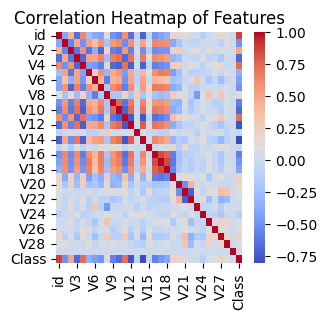

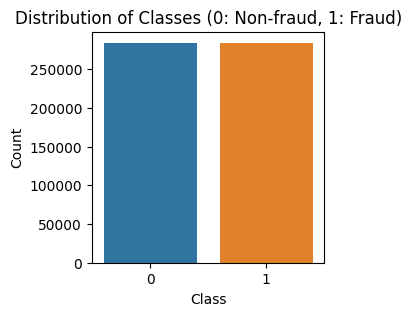

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(3, 3))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False, fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

# Histogram of the 'Class' variable
plt.figure(figsize=(3, 3))
sns.countplot(data=data, x='Class')
plt.title('Distribution of Classes (0: Non-fraud, 1: Fraud)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from tensorflow.keras import models, layers
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(X_train_scaled, y_train)

rus = RandomUnderSampler(random_state=42)
X_resampled_rus, y_resampled_rus = rus.fit_resample(X_train_scaled, y_train)

nm = NearMiss(version=1)
X_resampled_nm, y_resampled_nm = nm.fit_resample(X_train_scaled, y_train)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
print(X_resampled_smote.shape)


(455130, 30)


In [ ]:
features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

In [ ]:
features_train = X_resampled_smote.reshape(X_resampled_smote.shape[0], 100, 200, 3)
features_test = X_test_scaled.reshape(X_test_scaled.shape[0], 100, 200, 3)


ValueError: ignored

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', dilation_rate=1, input_shape=(100, 200, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', dilation_rate=2),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu', dilation_rate=2),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with SMOTE sampled data
history_smote = model.fit(X_resampled_smote, y_resampled_smote, epochs=10, validation_data=(features_test, y_test))

# Train the model with RandomUnderSampler sampled data
history_rus = model.fit(X_resampled_rus, y_resampled_rus, epochs=10, validation_data=(features_test, y_test))

# Train the model with NearMiss sampled data
history_nm = model.fit(X_resampled_nm, y_resampled_nm, epochs=10, validation_data=(features_test, y_test))

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.14.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
non_fraud_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

In [ ]:
non_fraud_data.shape, fraud_data.shape

((284315, 31), (284315, 31))

In [ ]:
non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])

non_fraud_data_sample.shape

(284315, 31)

In [ ]:
bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)
bal_data

<ipython-input-32-3b4b962f7f2c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
1,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
2,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
3,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
4,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,85551,0.044343,0.017000,1.777502,0.288669,0.381700,0.677847,0.630164,-0.117991,-0.382408,...,-0.166288,-0.368807,-0.084504,-0.000745,-0.676772,-0.077194,0.229829,0.360652,18274.53,0
568626,196825,-0.246841,-0.692880,1.281965,-1.616430,0.673036,0.472966,0.474038,-0.097771,-0.264495,...,-0.215421,-0.716541,-0.079650,0.373737,1.000047,0.553308,-0.312734,0.041203,22230.21,0
568627,39291,-0.056642,-0.303970,2.904568,0.019318,0.050741,0.971897,0.636262,-0.126819,0.800576,...,-0.244316,-0.462288,-0.036640,0.843093,0.203471,-0.917107,-0.270241,-0.413987,13112.00,0
568628,281861,0.040505,-0.040156,0.092867,-1.152490,0.576497,-0.687881,1.005084,-0.168096,0.201277,...,0.011803,0.824563,-0.205833,0.215178,-0.553791,0.214036,0.084340,0.382919,22157.89,0


In [ ]:
bal_data['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

In [ ]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.25,random_state=41,stratify = labels)

In [ ]:
features_train.shape, features_test.shape

((426472, 30), (142158, 30))

In [ ]:
labels_test.value_counts()
features_train.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
268649,552964,-0.471311,-0.531291,-0.133351,0.575593,-0.145554,0.789951,0.356525,-0.085892,-0.389820,...,0.105772,0.104623,0.919576,1.225081,0.206442,-0.538952,-0.037410,0.377913,-0.804142,17560.66
336041,284150,0.033993,-1.159517,-0.105260,-0.714791,0.593782,-0.712858,1.001870,-0.284360,-0.344792,...,0.293511,0.001776,0.421403,0.855064,0.064717,0.078265,2.011158,-0.513489,-0.262950,7310.36
397923,267837,-0.723573,0.667307,-0.348304,-1.153380,-0.022398,-0.150666,0.251688,0.277759,1.171517,...,0.748422,-0.014457,1.039601,0.187395,1.079936,-0.196890,-0.493771,0.769171,0.881796,15497.06
49984,334299,0.104803,0.708564,-0.749180,1.282398,1.027461,-0.534131,0.150668,0.016939,-1.230094,...,0.396439,-0.003709,-0.460140,-0.298596,-1.836199,-0.170468,1.177478,0.272174,0.430083,5462.23
4864,289179,-0.674376,0.534208,-0.824999,0.355644,-0.213469,-1.255265,-0.589377,0.387860,-0.831438,...,0.130105,0.264771,0.028241,-0.556501,-0.910436,-0.129977,-0.013973,0.815597,0.364060,9988.38


In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
features_train_smote, labels_train_smote = smote.fit_resample(features_train, labels_train)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
features_train_rus, labels_train_rus = rus.fit_resample(features_train, labels_train)


In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
features_train_nm, labels_train_nm = nm.fit_resample(features_train, labels_train)


In [ ]:
import numpy as np


features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

print("Shape of features_train:", features_train.shape)
print("Shape of features_test:", features_test.shape)


AttributeError: ignored

In [ ]:
features_train = features_train.reshape(features_train.shape[0], 30, 1, 1)
features_test = features_test.reshape(features_test.shape[0], 30, 1, 1)


In [ ]:
print(features_train.shape)
print(features_test.shape)


(426472, 30, 1, 1)
(142158, 30, 1, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense

# Defining the hyperparameters
epochs = 45
dilation_rate = 2

# Model definition
model = Sequential()

# FIRST LAYER with dilation rate
model.add(Conv1D(32, 3, activation='relu', dilation_rate=dilation_rate, input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# SECOND LAYER with dilation rate
model.add(Conv1D(64, 3, activation='relu', dilation_rate=dilation_rate))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Flattening the layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 26, 32)            128       
                                                                 
 batch_normalization (Batch  (None, 26, 32)            128       
 Normalization)                                                  
                                                                 
 max_pooling1d (MaxPooling1  (None, 13, 32)            0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 13, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             6208      
                                                                 
 batch_normalization_1 (Bat  (None, 9, 64)            

In [ ]:
model.compile(optimizer = Adam(lr=0.0001),loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(features_train, labels_train, epochs = epochs,
                    validation_data = (features_test,labels_test),verbose = 1)

Epoch 1/45
13328/13328 [==============================] - 123s 9ms/step - loss: 0.0298 - accuracy: 0.9906 - val_loss: 0.0079 - val_accuracy: 0.9982
Epoch 2/45
13328/13328 [==============================] - 108s 8ms/step - loss: 0.0136 - accuracy: 0.9962 - val_loss: 0.0059 - val_accuracy: 0.9989
Epoch 3/45
13328/13328 [==============================] - 117s 9ms/step - loss: 0.0118 - accuracy: 0.9968 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 4/45
13328/13328 [==============================] - 106s 8ms/step - loss: 0.0106 - accuracy: 0.9971 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 5/45
13328/13328 [==============================] - 107s 8ms/step - loss: 0.0104 - accuracy: 0.9972 - val_loss: 0.0046 - val_accuracy: 0.9990
Epoch 6/45
13328/13328 [==============================] - 107s 8ms/step - loss: 0.0096 - accuracy: 0.9974 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 7/45
13328/13328 [==============================] - 105s 8ms/step - loss: 0.0091 - accuracy: 0.9976 - val_

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D

# Data processing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

print(tf.__version__)

2.14.0


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [ ]:
data.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,...,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,164149.486122,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


In [ ]:
data['Class'].value_counts()

0    284315
1    284315
Name: Class, dtype: int64

In [ ]:
data.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
non_fraud_data = data[data['Class']==0]
fraud_data = data[data['Class']==1]

In [ ]:
non_fraud_data.shape, fraud_data.shape

((284315, 31), (284315, 31))

In [ ]:
non_fraud_data_sample = non_fraud_data.sample(fraud_data.shape[0])

non_fraud_data_sample.shape

(284315, 31)

In [ ]:
bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)
bal_data

<ipython-input-9-3b4b962f7f2c>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  bal_data = fraud_data.append(non_fraud_data_sample,ignore_index = True)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,541,-0.478427,0.142165,-0.046838,0.683350,0.067820,-0.404898,-0.206496,0.184366,-0.762935,...,0.098977,-0.075191,-0.481489,0.678900,-0.011520,0.409021,0.075859,-0.447139,1534.53,1
1,623,-0.617111,-1.733888,1.150655,0.207829,0.903533,-0.171524,0.551679,-0.167744,0.338861,...,0.153856,0.369734,1.471004,-0.497633,0.377656,-0.328051,-0.512415,-0.013653,10554.68,1
2,4920,-0.476617,0.088942,0.326333,0.220370,-0.026730,0.432409,0.646165,-0.240646,0.356997,...,-0.223141,-0.851929,0.153117,-0.127032,-0.334872,-1.353308,-0.192302,-0.470796,2785.98,1
3,6108,-0.832953,-0.024254,-0.260967,0.323532,-0.117119,-0.589167,-0.390612,-0.207889,0.351702,...,0.120451,0.121804,-0.453630,-0.064071,0.331833,-1.671579,-1.060239,1.939783,15897.18,1
4,6329,1.020308,0.425645,-0.554113,0.868349,2.367343,-0.360087,1.185828,-0.261569,-0.159521,...,-0.258401,-0.661236,-0.663639,-2.536292,2.502489,1.195597,-0.249226,0.254373,3492.59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,128250,-0.205715,-0.086220,1.312772,-0.066538,0.031430,1.292781,0.213866,0.169140,0.488451,...,-0.181776,-0.374023,-0.027376,-1.081261,-0.528516,-1.028830,-0.393765,-0.083143,10868.15,0
568626,268454,1.564176,-0.682487,0.255671,-0.515831,0.023871,0.307081,0.261178,-0.136895,1.374045,...,0.013402,0.748078,-0.009529,-0.592108,-0.246755,-1.421199,-0.195589,-0.183204,6150.63,0
568627,283715,-0.564555,0.440658,-0.304247,-0.235534,0.099714,0.300210,0.598343,0.215595,0.016416,...,-0.076257,0.337914,-0.101366,1.295816,0.440245,-0.990943,0.213521,0.351478,15279.97,0
568628,179533,1.533493,-0.844389,0.219200,-0.541800,0.239190,1.530147,0.085363,0.009576,0.311880,...,-0.246196,-0.580615,0.445368,-1.570808,-1.233237,-2.227938,-0.112580,-0.168924,14598.89,0


In [ ]:
bal_data['Class'].value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [ ]:
features = bal_data.drop('Class',axis=1)
labels = bal_data['Class']

In [ ]:
features_train,features_test,labels_train,labels_test = train_test_split(features,labels,test_size=.25,random_state=41,stratify = labels)

In [ ]:
features_train.shape, features_test.shape

((426472, 30), (142158, 30))

In [ ]:
labels_test.value_counts()
features_train.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
268649,552964,-0.471311,-0.531291,-0.133351,0.575593,-0.145554,0.789951,0.356525,-0.085892,-0.389820,...,0.105772,0.104623,0.919576,1.225081,0.206442,-0.538952,-0.037410,0.377913,-0.804142,17560.66
336041,174983,1.665648,-1.218559,0.156432,-1.498123,-0.224404,0.322453,0.104891,-0.169467,-0.168010,...,-0.248888,-0.106099,0.066270,0.045380,-0.688323,-0.629297,-0.432049,-0.243422,-0.171833,22948.79
397923,134786,1.123303,-0.570999,0.438182,-0.892394,0.078333,0.243768,0.273513,-0.165739,0.134291,...,-0.052544,-0.130424,-0.165626,-0.061665,-0.573204,0.684343,-0.590087,-0.193134,-0.019609,12390.20
49984,334299,0.104803,0.708564,-0.749180,1.282398,1.027461,-0.534131,0.150668,0.016939,-1.230094,...,0.396439,-0.003709,-0.460140,-0.298596,-1.836199,-0.170468,1.177478,0.272174,0.430083,5462.23
4864,289179,-0.674376,0.534208,-0.824999,0.355644,-0.213469,-1.255265,-0.589377,0.387860,-0.831438,...,0.130105,0.264771,0.028241,-0.556501,-0.910436,-0.129977,-0.013973,0.815597,0.364060,9988.38


In [ ]:
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.fit_transform(features_test)

# converting features into dataframe
features_train = pd.DataFrame(features_train)
features_test = pd.DataFrame(features_test)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
features_train_smote, labels_train_smote = smote.fit_resample(features_train, labels_train)


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
features_train_rus, labels_train_rus = rus.fit_resample(features_train, labels_train)


In [ ]:
from imblearn.under_sampling import NearMiss

nm = NearMiss(version=1)
features_train_nm, labels_train_nm = nm.fit_resample(features_train, labels_train)


In [ ]:
import numpy as np


features_train = features_train.to_numpy()
features_test = features_test.to_numpy()

print("Shape of features_train:", features_train.shape)
print("Shape of features_test:", features_test.shape)


Shape of features_train: (426472, 30)
Shape of features_test: (142158, 30)


In [ ]:
features_train = features_train.reshape(features_train.shape[0], 30, 1, 1)
features_test = features_test.reshape(features_test.shape[0], 30, 1, 1)


In [ ]:

features_train = features_train.reshape(features_train.shape[0], features_train.shape[1], 1)
features_test = features_test.reshape(features_test.shape[0], features_test.shape[1], 1)





In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense

# Defining the hyperparameters
epochs = 10

# Model definition
model = Sequential()

# FIRST LAYER - Convolutional layer
model.add(Conv1D(32, 3, activation='relu', input_shape=(30, 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# SECOND LAYER - Convolutional layer
model.add(Conv1D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.5))

# Flattening the layer
model.add(Flatten())

# Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# FINAL LAYER
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 28, 32)            128       
                                                                 
 batch_normalization_4 (Bat  (None, 28, 32)            128       
 chNormalization)                                                
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 14, 32)            0         
 g1D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 32)            0         
                                                                 
 conv1d_6 (Conv1D)           (None, 12, 64)            6208      
                                                                 
 batch_normalization_5 (Bat  (None, 12, 64)           

In [ ]:
history = model.fit(features_train, labels_train, epochs=epochs, validation_data=(features_test, labels_test), verbose=1)

Epoch 1/10
13328/13328 [==============================] - 126s 9ms/step - loss: 0.0257 - accuracy: 0.9921 - val_loss: 0.0056 - val_accuracy: 0.9989
Epoch 2/10
13328/13328 [==============================] - 112s 8ms/step - loss: 0.0119 - accuracy: 0.9969 - val_loss: 0.0049 - val_accuracy: 0.9991
Epoch 3/10
13328/13328 [==============================] - 112s 8ms/step - loss: 0.0100 - accuracy: 0.9974 - val_loss: 0.0048 - val_accuracy: 0.9991
Epoch 4/10
13328/13328 [==============================] - 109s 8ms/step - loss: 0.0093 - accuracy: 0.9977 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 5/10
13328/13328 [==============================] - 117s 9ms/step - loss: 0.0081 - accuracy: 0.9980 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 6/10
13328/13328 [==============================] - 108s 8ms/step - loss: 0.0079 - accuracy: 0.9981 - val_loss: 0.0038 - val_accuracy: 0.9992
Epoch 7/10
13328/13328 [==============================] - 108s 8ms/step - loss: 0.0074 - accuracy: 0.9982 - val_